In [56]:
import os
from openai import OpenAI
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import base64
import json

In [57]:
# # Your OpenAI API key and model

client = OpenAI(api_key="YOUR_API_KEY")
model_name = "gpt-4o" 

In [58]:
completion = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "What is the capital of France?"}
    ]
)

print(completion.choices[0].message.content)

The capital of France is Paris.


In [59]:
# Folder containing invoice images
data = '/Users/mamtaudai/Downloads/Data'

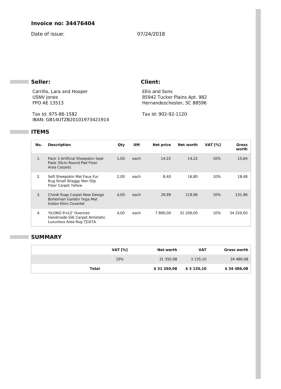

In [60]:
img_path = os.path.join(data, 'batch1-0500.jpg')
img = Image.open(img_path)   
plt.imshow(img)
plt.axis('off')
plt.show()

In [61]:
# Define a function to encode the image to base64

def encode_image_base64(image_path):
   with open(image_path, 'rb') as file:
       image_bytes = file.read()
   return base64.b64encode(image_bytes).decode("utf-8")    

In [62]:
# Define a function to extract data from a single image

def extract_invoice_fields(image_path):
    base64_img = encode_image_base64(image_path)
    image_data = {
        "type": "image_url",
        "image_url": {
            "url": f"data:image/jpeg;base64,{base64_img}"
        }
    }

    prompt = (
        "Extract the following fields from this invoice image:\n"
        "- Invoice Number\n"
        "- Invoice Data\n"
        "- Line Items(description, quantity, price per unit, total per line)\n"
        "Return as JSON"
    )

    response = client.chat.completions.create(
        model = model_name,
        messages = [
        {"role": "system", "content": "You extract structured data from invoices."},
        {"role": "user", "content": [image_data,{"type": "text", "text": prompt}]}
        ],
        temperature=0
    )

    return response.choices[0].message.content

In [63]:
# Process all .jpg images and collect results

results = []

for filename in os.listdir(data):
    if filename.lower().endswith(".jpg"):
        file_path = os.path.join(data, filename)
        print(f"Processing: {filename}")

        try:
            result = extract_invoice_fields(file_path)
            results.append({"file": filename, "extracted_data": result})
        except Exception as e:
            print(f"Error with {filename}: {e}")
            results.append({"file": filename, "error": str(e)})
    

Processing: batch1-0500.jpg
Processing: batch1-0514.jpg
Processing: batch1-0515.jpg
Processing: batch1-0501.jpg
Processing: batch1-0503.jpg
Processing: batch1-0502.jpg
Processing: batch1-0512.jpg
Processing: batch1-0506.jpg
Processing: batch1-0507.jpg
Processing: batch1-0513.jpg
Processing: batch1-0505.jpg
Processing: batch1-0511.jpg
Processing: batch1-0510.jpg
Processing: batch1-0504.jpg
Processing: batch1-0509.jpg
Processing: batch1-0508.jpg


In [64]:
# Save the results to a JSON file

with open("extracted_invoices.json", "w") as f:
    json.dump(results, f, indent=2)

print("Results saved to extracted_invoices.json")


Results saved to extracted_invoices.json


In [65]:
image_path = "/Users/mamtaudai/Downloads/Data/batch1-0500.jpg"  

try:
    result = extract_invoice_fields(image_path)
    print("Extracted Output:")
    print(result)
except Exception as e:
    print(f"Error processing {image_path}: {e}")


Extracted Output:
```json
{
  "Invoice Number": "34476404",
  "Invoice Date": "07/24/2018",
  "Line Items": [
    {
      "Description": "Pack 3 Artificial Sheepskin Seat Pads 30cm Round Pad Floor Area Carpets",
      "Quantity": 1,
      "Price per Unit": 14.22,
      "Total per Line": 14.22
    },
    {
      "Description": "Soft Sheepskin Mat Faux Fur Rug Small Shaggy Non Slip Floor Carpet Yellow",
      "Quantity": 2,
      "Price per Unit": 8.40,
      "Total per Line": 16.80
    },
    {
      "Description": "Chindi Rugs Carpet New Design Bohemian Garden Yoga Mat Indian Kilim Coverlet",
      "Quantity": 4,
      "Price per Unit": 29.99,
      "Total per Line": 119.96
    },
    {
      "Description": "YILONG 9'x12' Oversize Handmade Silk Carpet Antistatic Luxurious Area Rug TJ107A",
      "Quantity": 4,
      "Price per Unit": 7800.00,
      "Total per Line": 31200.00
    }
  ]
}
```
